In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat, u_darrays
from scipy.stats import gaussian_kde
import pickle as pkl
from utils import u_plot as uplot, u_darrays as uda, u_met
import pandas as pd
from metpy import calc
from metpy.units import units

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
ar = xr.open_dataarray(cnst.GRIDSAT + 'aggs/WAbox_meanT-50_hov_5000km2.nc')

In [4]:
chirps = xr.open_mfdataset(cnst.CHIRPS_MONTHLY + "*.nc", concat_dim='time',autoclose=True)
chirps = uda.flip_lat(chirps)
chov = chirps.sel(lat=slice(4.5,20), lon=slice(-10,10)).groupby('time.month').mean('time').mean('lon')

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be 

In [5]:
chirps = xr.open_mfdataset('/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/monthly/' + "*.nc4", concat_dim='time',autoclose=True)
#chirps = uda.flip_lat(chirps)
chov = chirps.sel(lat=slice(4.5,20), lon=slice(-10,10)).groupby('time.month').mean('time').mean('lon')

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from 

In [6]:
chov = chov.load()

(array([980., 186., 138., 159., 156., 144.,  54.,  26.,   9.,   8.]),
 array([1.6814716e-01, 3.7169987e+01, 7.4171829e+01, 1.1117367e+02,
        1.4817551e+02, 1.8517735e+02, 2.2217918e+02, 2.5918103e+02,
        2.9618286e+02, 3.3318472e+02, 3.7018655e+02], dtype=float32),
 <a list of 10 Patch objects>)

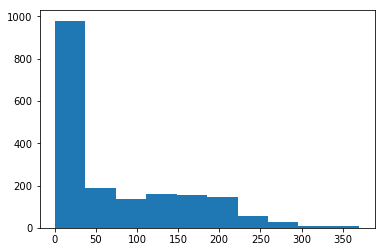

In [7]:
plt.hist(chov['precipitation'][:,:].values.flatten()*24*30)

In [8]:
era_pl = xr.open_dataset(cnst.ERA5_MONTHLY_PL_SYNOP)
era_pl = era_pl.where((era_pl['q'])['time.hour'] == 12, drop=True)
era_pl = u_darrays.flip_lat(era_pl)

In [9]:
era_srfc = xr.open_dataset(cnst.ERA5_MONTHLY_SRFC_SYNOP)
era_srfc = era_srfc.where((era_srfc['t2m'])['time.hour'] == 12, drop=True)
era_srfc = u_darrays.flip_lat(era_srfc)

In [10]:
era_srfc = era_srfc.sel(latitude=slice(4.5,20), longitude=slice(-10,10)).groupby('time.month').mean('time').mean('longitude')

/home/ck/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [11]:
era_pl = era_pl.sel(latitude=slice(4.5,20), longitude=slice(-10,10)).groupby('time.month').mean('time').mean('longitude')

In [12]:
u_shear = era_pl['u'].sel(level=slice(600,700)).mean('level') - era_pl['u'].sel(level=slice(900,925)).mean('level')
v_shear = era_pl['v'].sel(level=slice(600,700)).mean('level') - era_pl['v'].sel(level=slice(900,925)).mean('level')

ws, wd = u_met.u_v_to_ws_wd(u_shear,v_shear)

q = era_pl['q'].sel(level=slice(900,950)).mean('level')*1000
qmid = era_pl['q'].sel(level=slice(600,700)).mean('level')*1000
qdiff = q-qmid
rh = era_pl['r'].sel(level=slice(650,700)).mean('level')
rhdown = era_pl['r'].sel(level=slice(900,950)).mean('level')
tdiff = era_pl['t'].sel(level=925)-era_pl['t'].sel(level=650)
theta_low = u_met.theta_e(850,era_pl['t'].sel(level=850).values-273.15,era_pl['q'].sel(level=850).values)
theta_high = u_met.theta_e(650,era_pl['t'].sel(level=650).values-273.15,era_pl['q'].sel(level=650).values)


tq = units.Quantity(era_pl['t'].sel(level=600).values, 'K')
pq = units.Quantity(600, 'hPa')
cross_theta_es = calc.saturation_equivalent_potential_temperature(pq,tq)
    
thetadiff = theta_low-(np.array(cross_theta_es)-273.15) #theta_high
#ipdb.set_trace()

thetad_low = u_met.theta(925,era_pl['t'].sel(level=925).values-273.15)
thetad_high = u_met.theta(700,era_pl['t'].sel(level=700).values-273.15)

thetadiffd = thetad_low-thetad_high


div = era_pl['d'].sel(level=slice(850,900)).mean('level') * (era_pl['q'].sel(level=slice(850,900)).mean('level')*1000)

tpw = era_srfc['tcwv']
cape = era_srfc['cape']

In [13]:
mean = ar.mean('year')

In [14]:
ws

array([[ 7.62455211,  7.15891694,  6.45392812,  5.37833296,  4.23784058,
         3.32083093,  2.50484837,  1.52506927,  1.44470026,  2.77682686,
         4.12551657,  5.44011923,  6.91612203,  8.33190369,  9.41098023,
        10.4082519 , 11.29304868, 11.93903689, 11.77350061, 12.10119453,
        12.3973564 , 12.95460651],
       [ 9.48343069,  8.83629158,  8.00597115,  6.83170335,  5.58641752,
         4.49315127,  3.40358484,  2.08609378,  0.82739586,  1.84938148,
         3.40671275,  4.86483815,  6.39692605,  7.8041065 ,  8.83028609,
         9.77638269, 10.63822921, 11.32861595, 11.36468528, 11.70331351,
        12.00148955, 12.57093997],
       [11.61575371, 11.10293615, 10.39890014,  9.43188911,  8.31948669,
         7.24934595,  6.08502605,  4.93202524,  3.58192861,  1.92122704,
         0.64562263,  1.90613734,  3.65074568,  5.37602566,  6.71967482,
         7.81938084,  8.75748799,  9.54975766,  9.86494453, 10.32199202,
        10.67920906, 11.18516368],
       [13.15467536

In [15]:
## a clean way of plotting - use matplotlib functions directly:

def draw_map(ax, data, lon, lat, l1, l2, nb,title=None,  text=None, mask_sig=None, quiver=None, contour=None, contour2=None, cbar_label=None,cmap=None):
    #mapp = ax.contourf(lon, lat, data, **kwargs)  # this is the actual plot
    nb_lev = nb
    cmapp = uplot.discrete_cmap(nb_lev, base_cmap=cmap)

#     mapp = ax.pcolormesh(np.arange(0.5,13,1), lat,data
#                           ,cmap=cmapp, vmin=l1, vmax=l2)
    
    mapp = ax.contourf(np.arange(1,13,1), lat,data, levels=np.round(np.linspace(l1,l2,nb),1), cmap=cmap )

    #cbar = plt.colorbar(mapp, ticks=np.linspace(l1,l2,nb_lev+1))
    cbar = plt.colorbar(mapp)
    plt.title(title)
    plt.text(0.03,0.85, text, transform=ax.transAxes, fontsize=14)
    ax.axhline(8.5, linestyle='dashed')
    
    ## mask for significance indicator
    if mask_sig is not None:
         plt.pcolormesh(lon, lat, mask_sig, colors='none', hatches='.',
                     levels=[0.5, 1], linewidth=0.1)
    
    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'], scale=quiver['scale'])
    ## additional contour on plot   
    if contour is not None:
        cs = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], cmap=contour['cmap'] )
        plt.clabel(cs, inline=1, fontsize=8, fmt="%1.1f")
        
    if contour2 is not None:
        cs = ax.contour(contour2['x'], contour2['y'], contour2['data'], levels=contour2['levels'], colors=contour2['color'], linewidths=0.5 )
        plt.clabel(cs, inline=1, fontsize=8, fmt="%1.1f")
    
#     ax.coastlines()   ## adds coastlines
#     # Gridlines
#     xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
#     xl.xlabels_top = False   ## labels off
#     xl.ylabels_right = False
#     plt.title(title)
#     # Countries
#     ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
   # cbar = plt.colorbar(mapp)  # adds colorbar
    cbar.set_label(cbar_label)   

In [16]:
extr_rain = xr.open_dataarray('/home/ck/DIR/cornkle/figs/CLOVER/maxRain_hov_GPM_17-19UTC.nc')

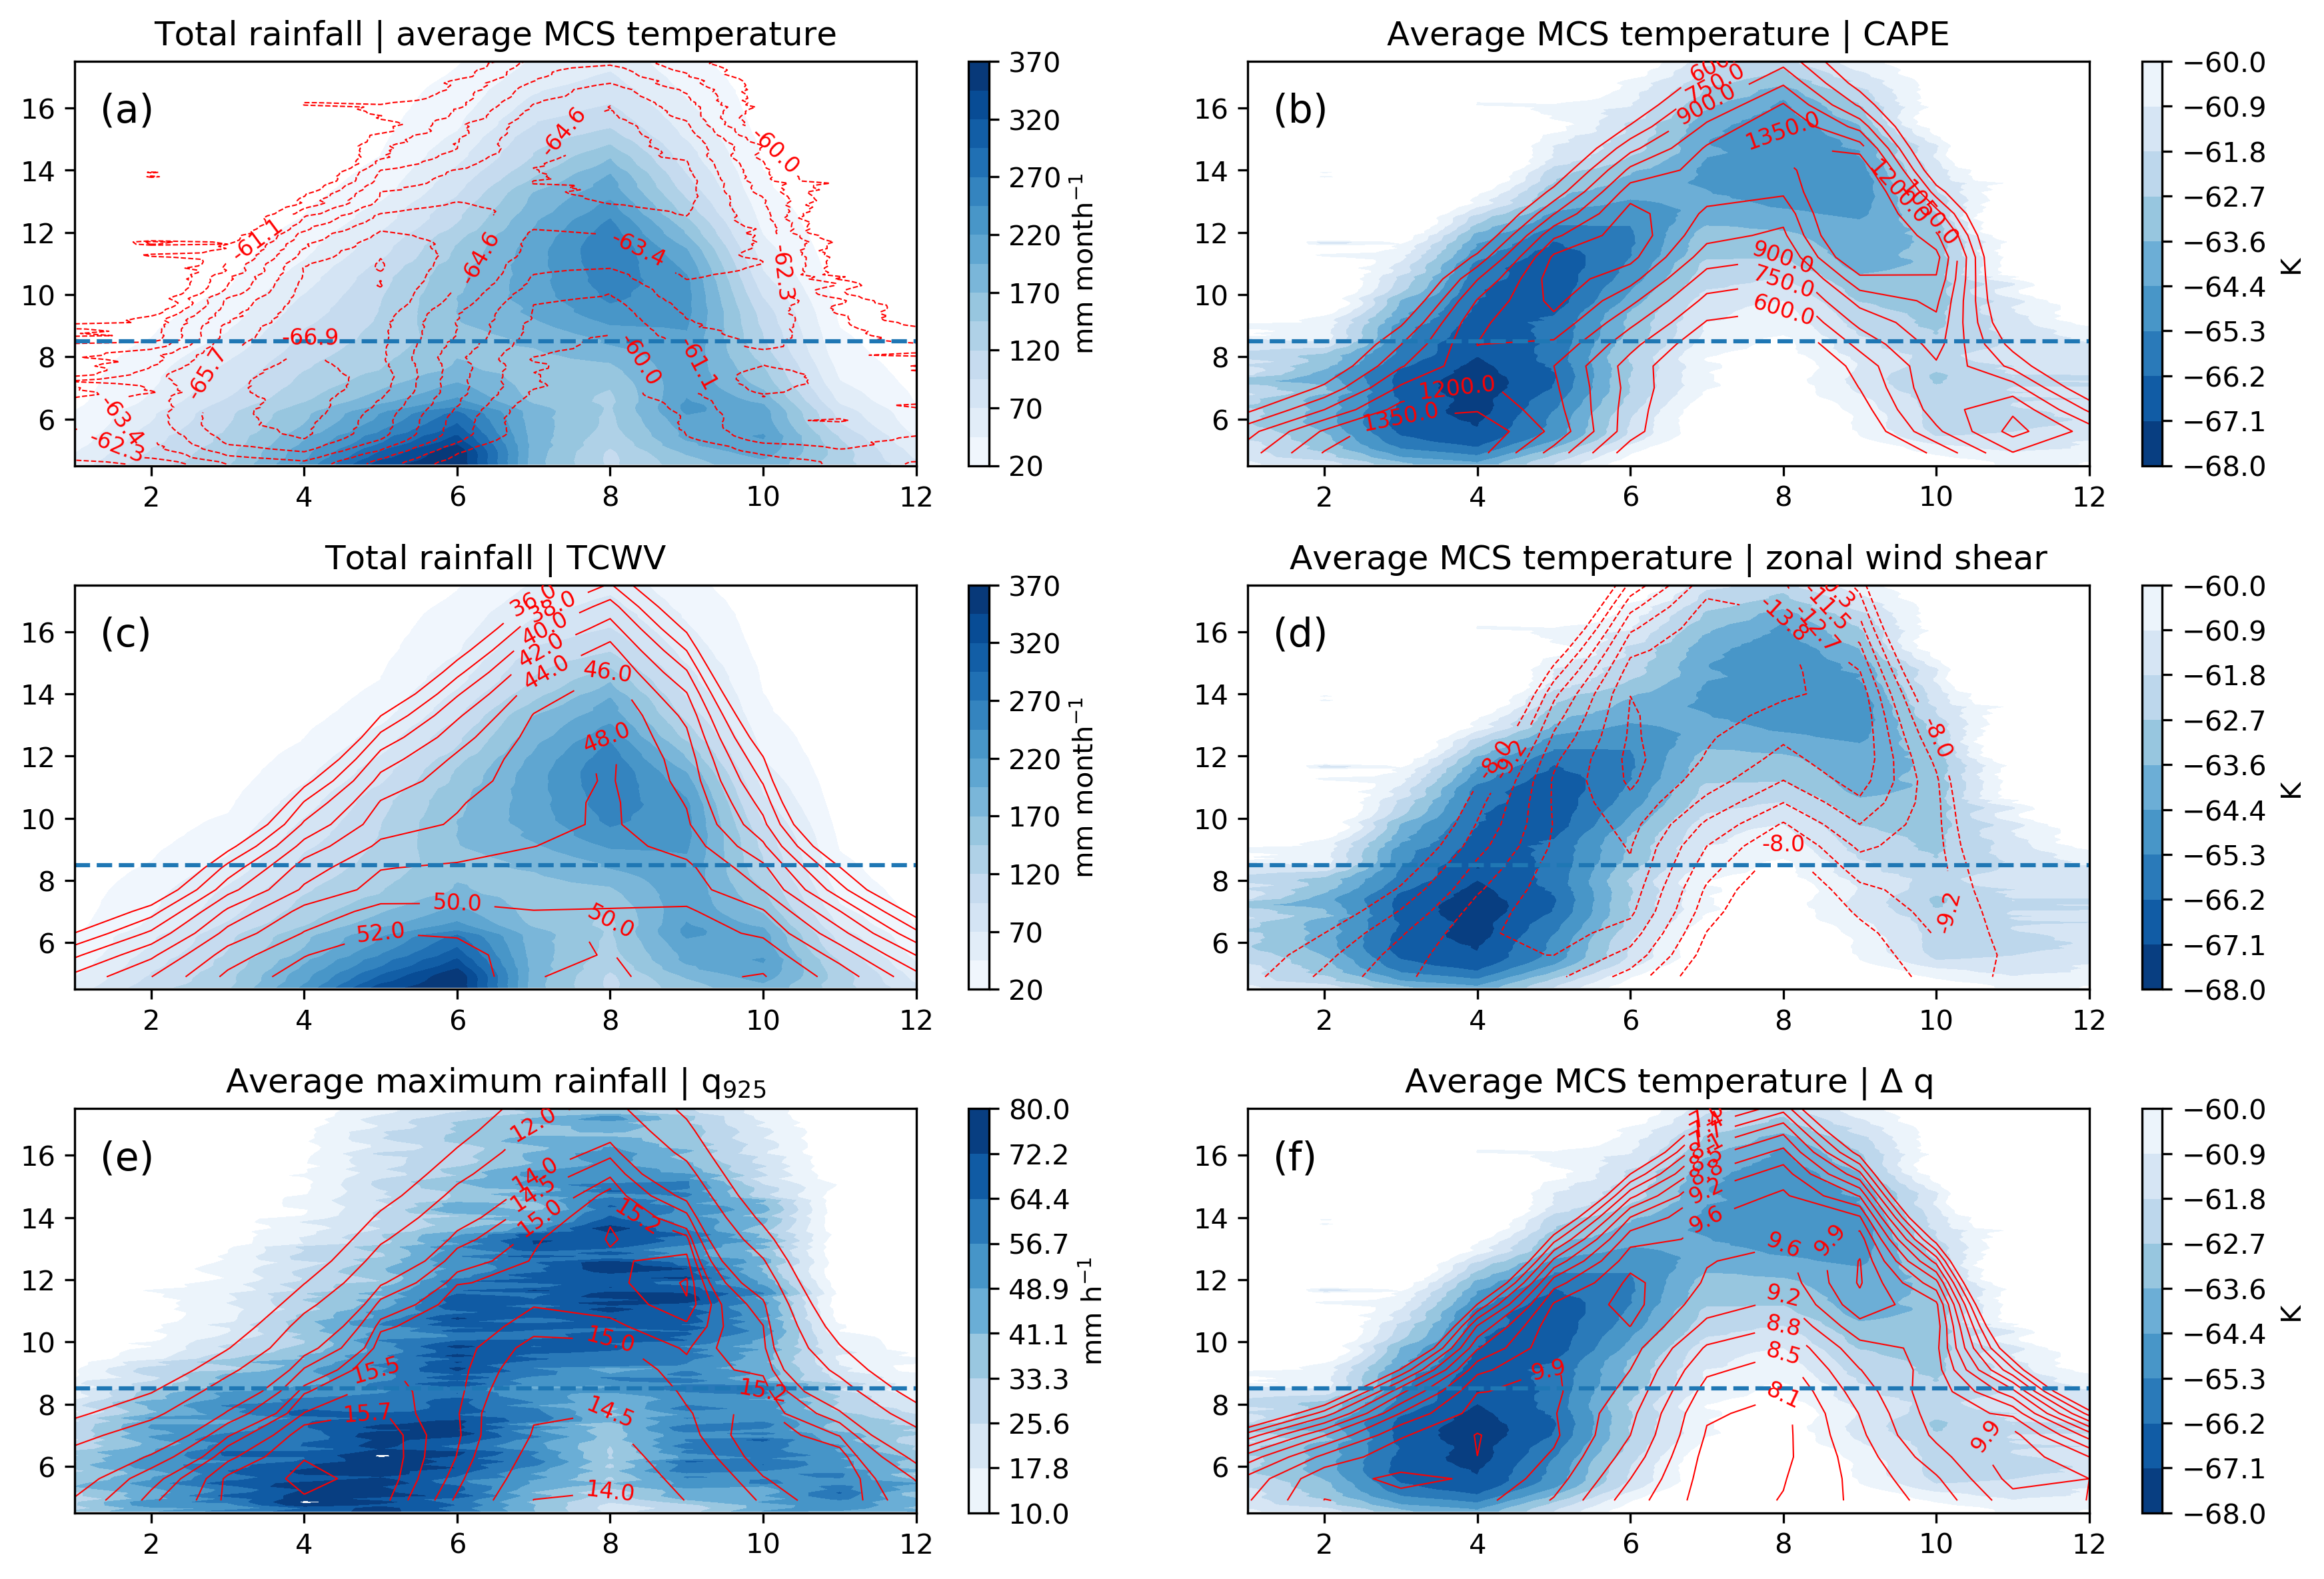

In [17]:
f = plt.figure(figsize=(12,8), dpi=300)
ax = f.add_subplot(325)
#contour = {'x' : chov.month.values, 'y': chov.lat.values, 'data': chov['precip'].values.T, 'levels': np.linspace(4,300,10), 'cmap':'jet'}
contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': q.T, 'levels': [10,12,14,14.5,15,15.2,15.5,15.7,16], 'color':'red'}
draw_map(ax, extr_rain.values.T[6::,:], np.arange(1,13,1), extr_rain.lat[6::], 10, 80, 10, cmap='Blues',  \
         title=r"Average maximum rainfall | q$_{925}$", text='(e)', contour2=contour2, cbar_label='mm h$^{-1}$')

ax.set_ylim(4.5,17.5)

ax = f.add_subplot(323)
#contour = {'x' : chov.month.values, 'y': chov.lat.values, 'data': chov['precip'].values.T, 'levels': np.linspace(4,300,10), 'cmap':'jet'}
contour2 = {'x' : tpw.month.values, 'y': tpw.latitude.values, 'data': tpw.values.T, 'levels': np.arange(36,53,2), 'color':'red'}
draw_map(ax,chov['precipitation'].values.T*24*30 , chov.month.values, chov.lat.values, 20, 370,15, \
         title='Total rainfall | TCWV',  text='(c)',cmap='Blues',  contour2=contour2, cbar_label='mm month$^{-1}$')
ax.set_ylim(4.5,17.5)

ax1 = f.add_subplot(322)
#contour = {'x' : shear.month.values, 'y': shear.latitude.values, 'data': shear.values.T, 'levels': np.linspace(-12,-8 ,5), 'cmap':'viridis_r'}
#contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': shear.values.T, 'levels': np.linspace(-15,-8,10), 'color':'red'}
contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': cape.T, 'levels': np.arange(600,1500,150), 'color':'red'} #
draw_map(ax1, mean.values.T, mean.month, mean.lat, -68, -60, 10, cmap='Blues_r',  \
         title=r"Average MCS temperature | CAPE", text='(b)', contour2=contour2, cbar_label='K')
ax1.set_ylim(4.5,17.5)

ax1 = f.add_subplot(324)
#contour = {'x' : shear.month.values, 'y': shear.latitude.values, 'data': shear.values.T, 'levels': np.linspace(-12,-8 ,5), 'cmap':'viridis_r'}
contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': u_shear.T, 'levels': np.linspace(-15,-8,7) , 'color':'red'} #np.linspace(-15,-8,7)
#contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': thetadiff.T, 'levels': [-10,-5,-2,2,5,10,12,13, 13.4, 14], 'color':'red'}
draw_map(ax1, mean.values.T, mean.month, mean.lat, -68, -60, 10, cmap='Blues_r', \
         title='Average MCS temperature | zonal wind shear', text='(d)', contour2=contour2, cbar_label='K')
ax1.set_ylim(4.5,17.5)

ax1 = f.add_subplot(326)
#contour = {'x' : shear.month.values, 'y': shear.latitude.values, 'data': shear.values.T, 'levels': np.linspace(-12,-8 ,5), 'cmap':'viridis_r'}
contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': qdiff.T, 'levels': np.linspace(7,14,20), 'color':'red'}
#contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': thetadiff.T, 'levels': [-10,-5,-2,2,5,10,12,13, 13.4, 14], 'color':'red'}
draw_map(ax1, mean.values.T, mean.month, mean.lat, -68, -60, 10, cmap='Blues_r', \
         title=r"Average MCS temperature | $\Delta$ q", text='(f)', contour2=contour2, cbar_label='K')
ax1.set_ylim(4.5,17.5)

ax1 = f.add_subplot(321)
#contour = {'x' : shear.month.values, 'y': shear.latitude.values, 'data': shear.values.T, 'levels': np.linspace(-12,-8 ,5), 'cmap':'viridis_r'}
contour2 = {'x' : mean.month, 'y': mean.lat, 'data': mean.values.T, 'levels': np.linspace(-68,-60,8), 'color':'red'}
#contour2 = {'x' : tdiff.month.values, 'y': cape.latitude.values, 'data': thetadiff.T, 'levels': [-10,-5,-2,2,5,10,12,13, 13.4, 14], 'color':'red'}
draw_map(ax1,chov['precipitation'].values.T*24*30 , chov.month.values, chov.lat.values, 20, 370,15, cmap='Blues',  \
         title='Total rainfall | average MCS temperature', text='(a)', contour2=contour2, cbar_label='mm month$^{-1}$')
ax1.set_ylim(4.5,17.5)

plt.tight_layout()
#plt.savefig('/home/ck/DIR/cornkle/figs/CLOVER/paper1/fig2_qdiff.jpg')

In [18]:
extr_rain = xr.open_dataarray('/home/ck/DIR/cornkle/figs/CLOVER/maxRain_hov_GPM_17-19UTC.nc')

In [43]:
pos = np.where((mean.lat <=7) & (mean.lat >= 4.8))  # TIR lats
poschov = np.where((chov.lat.values <=7) & (chov.lat.values >= 4.8))  # rainfall lats
posextreme = np.where((extr_rain.lat <=7) & (extr_rain.lat >= 4.8))  # extreme rainfall lats
epos = np.where((cape.latitude.values <=7) & (cape.latitude.values >= 4.8)) 

In [44]:
pos

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),)

In [45]:
mean.values.T.shape

(221, 12)

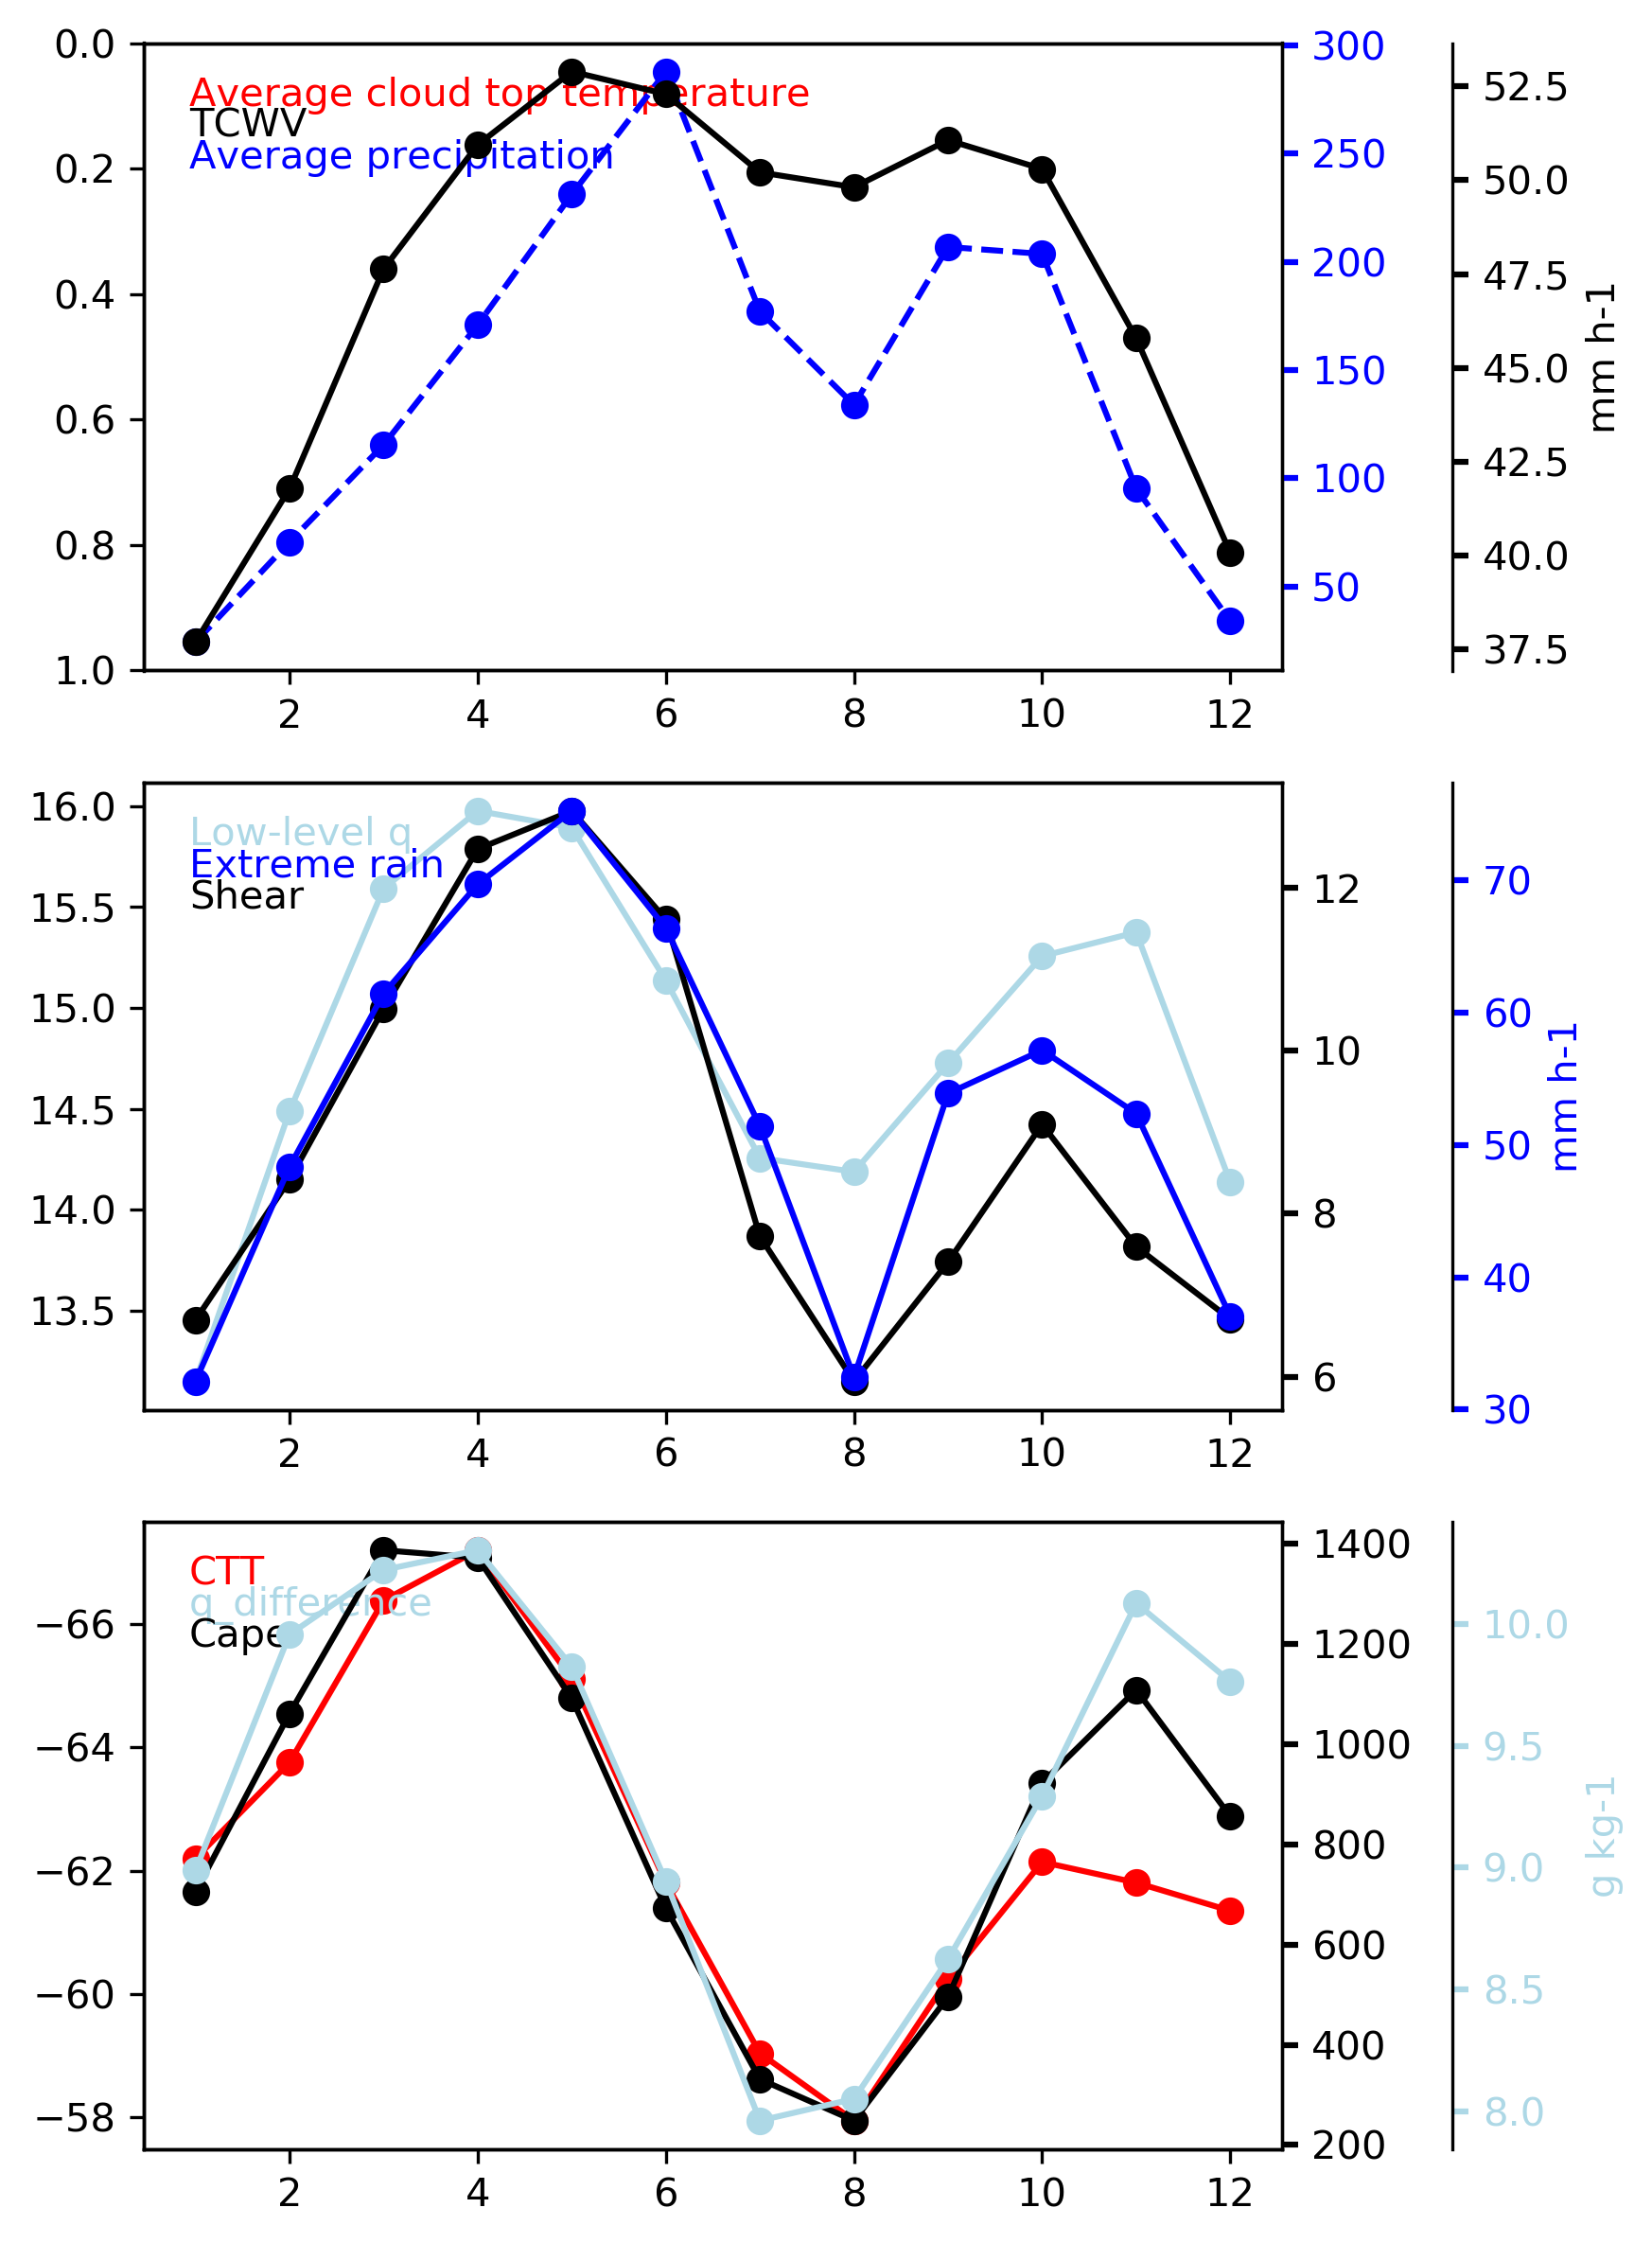

In [46]:
f = plt.figure(figsize=(6,8), dpi=300)
ax1 = f.add_subplot(311)
#ax1.plot(mean.month,np.percentile(mean.values.T[pos[0],:], 75, axis=0), color='r', linestyle='solid', marker='o', label='CCT')
plt.gca().invert_yaxis()

ax2 = ax1.twinx()
ax3 = ax1.twinx()
pl2, = ax2.plot(mean.month,np.mean((chov['precipitation'].values.T*24*30)[poschov[0],:], axis=0), color='b', linestyle='dashed', marker='o', label='Mean precip')
pl3, = ax3.plot(mean.month,np.mean(tpw.values.T[epos[0],:], axis=0), color='k', linestyle='solid', marker='o', label='TCWV')

ax2.yaxis.label.set_color(pl2.get_color())
ax3.yaxis.label.set_color(pl3.get_color())


tkw = dict(size=4, width=1.5)
ax2.tick_params(axis='y', colors=pl2.get_color(), **tkw)
ax3.tick_params(axis='y', colors=pl3.get_color(), **tkw)


ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('mm h-1')
#ax1.set_ylim(-58,-68)
ax1.text(0.04,0.9, 'Average cloud top temperature',transform=ax1.transAxes, color='red')
ax1.text(0.04,0.85, 'TCWV',transform=ax1.transAxes, color='k')
ax1.text(0.04,0.8, 'Average precipitation',transform=ax1.transAxes, color='b')

ax1 = f.add_subplot(312)
ax1.plot(mean.month,np.median(q.T[epos[0],:], axis=0), color='lightblue', linestyle='solid', marker='o')

ax2 = ax1.twinx()
ax3 = ax1.twinx()

pl3, = ax3.plot(mean.month,np.percentile((extr_rain.values.T)[posextreme[0],:], 50,axis=0), color='blue', linestyle='solid', marker='o')
pl2, = ax2.plot(mean.month,np.percentile(u_shear.T[epos[0],:], 50, axis=0)*-1, color='k', linestyle='solid', marker='o')

ax2.yaxis.label.set_color(pl2.get_color())
ax3.yaxis.label.set_color(pl3.get_color())


tkw = dict(size=4, width=1.5)
ax2.tick_params(axis='y', colors=pl2.get_color(), **tkw)
ax3.tick_params(axis='y', colors=pl3.get_color(), **tkw)


ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('mm h-1')

ax1.text(0.04,0.9, 'Low-level q',transform=ax1.transAxes, color='lightblue')
ax1.text(0.04,0.85, 'Extreme rain',transform=ax1.transAxes, color='b')
ax1.text(0.04,0.8, 'Shear',transform=ax1.transAxes, color='k')

ax1 = f.add_subplot(313)
ax1.plot(mean.month,np.median(mean.values.T[pos[0],:], axis=0), color='r', linestyle='solid', marker='o', label='CCT')
plt.gca().invert_yaxis() 

ax2 = ax1.twinx()
ax3 = ax1.twinx()

pl3, = ax3.plot(mean.month,np.median(qdiff.T[epos[0],:], axis=0), color='lightblue', linestyle='solid', marker='o')
pl2, = ax2.plot(mean.month,np.median(cape.T[epos[0],:], axis=0), color='k', linestyle='solid', marker='o')

ax2.yaxis.label.set_color(pl2.get_color())
ax3.yaxis.label.set_color(pl3.get_color())


tkw = dict(size=4, width=1.5)
ax2.tick_params(axis='y', colors=pl2.get_color(), **tkw)
ax3.tick_params(axis='y', colors=pl3.get_color(), **tkw)

ax1.text(0.04,0.9, 'CTT',transform=ax1.transAxes, color='r')
ax1.text(0.04,0.85, 'q_difference',transform=ax1.transAxes, color='lightblue')
ax1.text(0.04,0.8, 'Cape',transform=ax1.transAxes, color='k')


ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('g kg-1')

plt.tight_layout()

In [ ]:
f = plt.figure(figsize=(6,8), dpi=300)
ax1 = f.add_subplot(121)
#ax1.plot(mean.month,np.percentile(mean.values.T[pos[0],:], 75, axis=0), color='r', linestyle='solid', marker='o', label='CCT')
plt.gca().invert_yaxis()

ax2 = ax1.twinx()
ax3 = ax1.twinx()
pl2, = ax2.plot(mean.month,np.mean((chov['precipitation'].values.T*24*30)[poschov[0],:], axis=0), color='b', linestyle='dashed', marker='o', label='Mean precip')
pl3, = ax3.plot(mean.month,np.mean(tpw.values.T[epos[0],:], axis=0), color='k', linestyle='solid', marker='o', label='TCWV')

ax2.yaxis.label.set_color(pl2.get_color())
ax3.yaxis.label.set_color(pl3.get_color())


tkw = dict(size=4, width=1.5)
ax2.tick_params(axis='y', colors=pl2.get_color(), **tkw)
ax3.tick_params(axis='y', colors=pl3.get_color(), **tkw)


ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('mm h-1')
#ax1.set_ylim(-58,-68)
ax1.text(0.04,0.9, 'Average cloud top temperature',transform=ax1.transAxes, color='red')
ax1.text(0.04,0.85, 'TCWV',transform=ax1.transAxes, color='k')
ax1.text(0.04,0.8, 'Average precipitation',transform=ax1.transAxes, color='b')

ax1 = f.add_subplot(312)
ax1.plot(mean.month,np.median(q.T[epos[0],:], axis=0), color='lightblue', linestyle='solid', marker='o')

ax2 = ax1.twinx()
ax3 = ax1.twinx()

pl3, = ax3.plot(mean.month,np.percentile((extr_rain.values.T)[posextreme[0],:], 50,axis=0), color='blue', linestyle='solid', marker='o')
pl2, = ax2.plot(mean.month,np.percentile(u_shear.T[epos[0],:], 50, axis=0)*-1, color='k', linestyle='solid', marker='o')

ax2.yaxis.label.set_color(pl2.get_color())
ax3.yaxis.label.set_color(pl3.get_color())


tkw = dict(size=4, width=1.5)
ax2.tick_params(axis='y', colors=pl2.get_color(), **tkw)
ax3.tick_params(axis='y', colors=pl3.get_color(), **tkw)


ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('mm h-1')

ax1.text(0.04,0.9, 'Low-level q',transform=ax1.transAxes, color='lightblue')
ax1.text(0.04,0.85, 'Extreme rain',transform=ax1.transAxes, color='b')
ax1.text(0.04,0.8, 'Shear',transform=ax1.transAxes, color='k')

ax1 = f.add_subplot(313)
ax1.plot(mean.month,np.median(mean.values.T[pos[0],:], axis=0), color='r', linestyle='solid', marker='o', label='CCT')
plt.gca().invert_yaxis() 

ax2 = ax1.twinx()
ax3 = ax1.twinx()

pl3, = ax3.plot(mean.month,np.median(qdiff.T[epos[0],:], axis=0), color='lightblue', linestyle='solid', marker='o')
pl2, = ax2.plot(mean.month,np.median(cape.T[epos[0],:], axis=0), color='k', linestyle='solid', marker='o')

ax2.yaxis.label.set_color(pl2.get_color())
ax3.yaxis.label.set_color(pl3.get_color())


tkw = dict(size=4, width=1.5)
ax2.tick_params(axis='y', colors=pl2.get_color(), **tkw)
ax3.tick_params(axis='y', colors=pl3.get_color(), **tkw)

ax1.text(0.04,0.9, 'CTT',transform=ax1.transAxes, color='r')
ax1.text(0.04,0.85, 'q_difference',transform=ax1.transAxes, color='lightblue')
ax1.text(0.04,0.8, 'Cape',transform=ax1.transAxes, color='k')


ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('g kg-1')

plt.tight_layout()